In [1]:
# minimal imports
import pandas as pd
import numpy as np
from plotnine import *
import plotnine as p9

# for graphical enhancement
from mizani.formatters import date_format, percent_format, dollar_format, comma_format
from pysocviz.properties import colors

# dataset packages
from pysocviz.reader import load_dataset
from gapminder import gapminder
import plotnine.data as p9data

gss_sm = load_dataset('gss_sm')
midwest = p9data.midwest
titanic = load_dataset('titanic')

p9.options.figure_size = (6, 6)
theme_set(theme_minimal(base_family='Noto Sans CJK JP'))

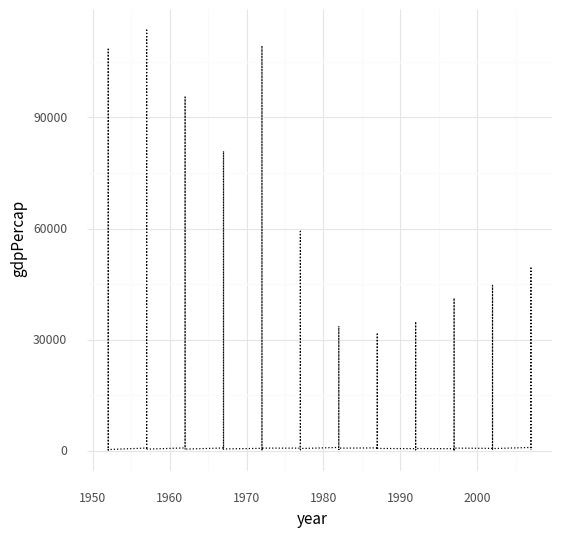

<ggplot: (8741655364443)>

In [2]:
# Fig. 4.1
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line()

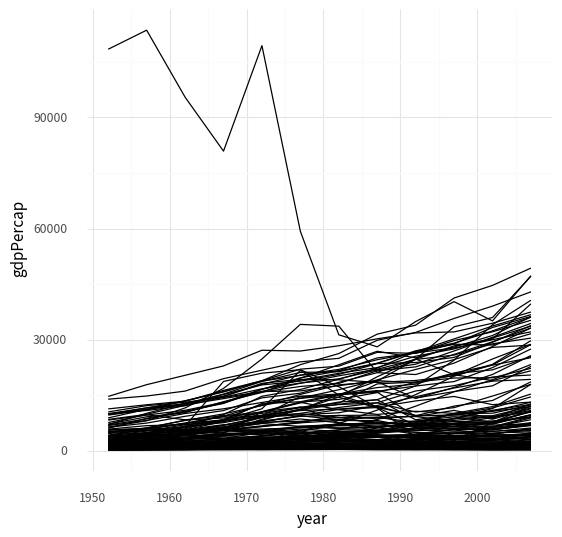

<ggplot: (8741589339383)>

In [3]:
# Fig. 4.2
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line(aes(group='country'))

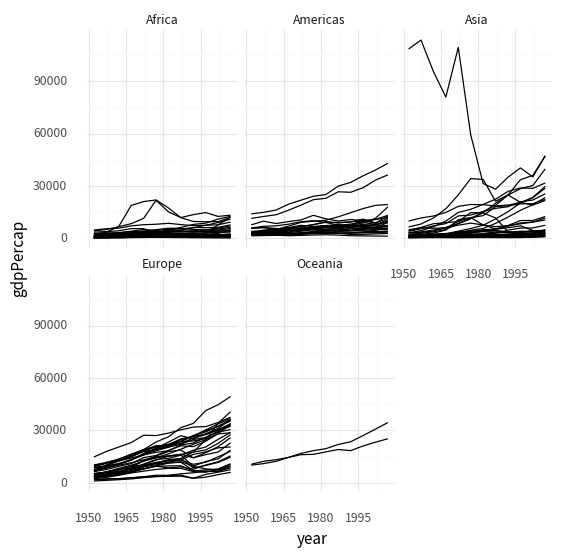

<ggplot: (8741579729890)>

In [4]:
# Fig. 4.3
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line(aes(group='country')
) + facet_wrap('continent') + scale_x_continuous(
  breaks=lambda x: np.ceil(np.linspace(x[0], x[1], 5))
)

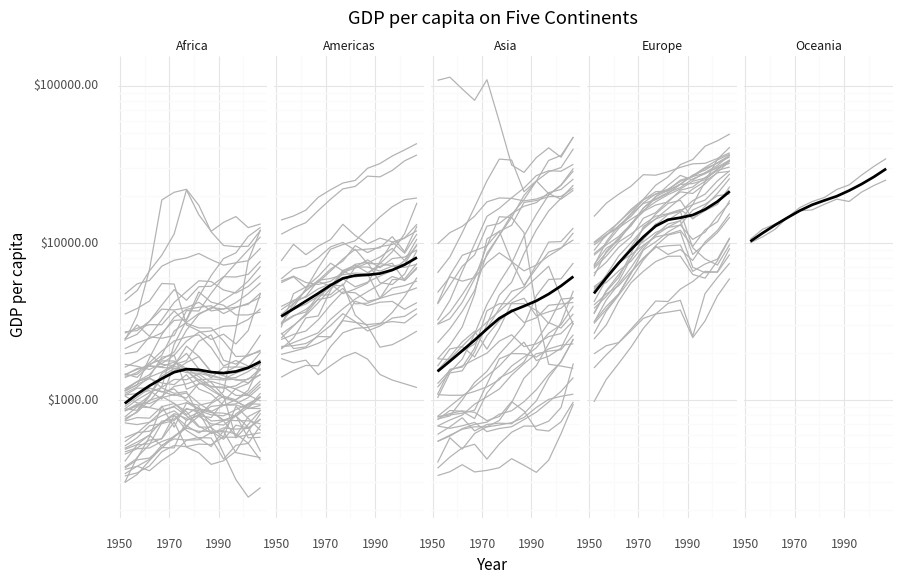

<ggplot: (8741579472107)>

In [5]:
# Fig. 4.4
p = ggplot(gapminder, aes(x='year', y='gdpPercap'))
p + geom_line(
  aes(group='country'),
  color=colors.get('gray70')
) + geom_smooth(
  size=1.1, method='loess', se=False
) + scale_y_log10(
  labels=dollar_format()
) + facet_wrap(
  'continent', ncol=5
) + labs(
  x="Year",
  y="GDP per capita",
  title="GDP per capita on Five Continents"
) + scale_x_continuous(
  breaks=lambda x: np.ceil(np.linspace(x[0], x[1], 4))
) + theme(figure_size=(10, 6))

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 18 rows containing missing values.


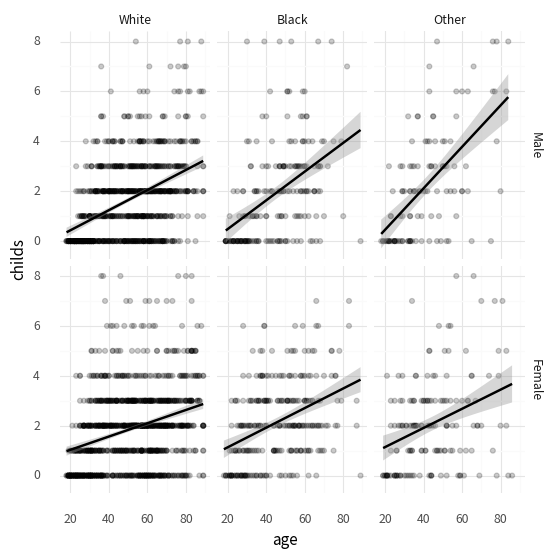

<ggplot: (8741579448860)>

In [6]:
# Fig. 4.5
p = ggplot(gss_sm, aes(x='age', y='childs'))
p + geom_point(alpha=0.2) + geom_smooth() + facet_grid(['sex', 'race'])

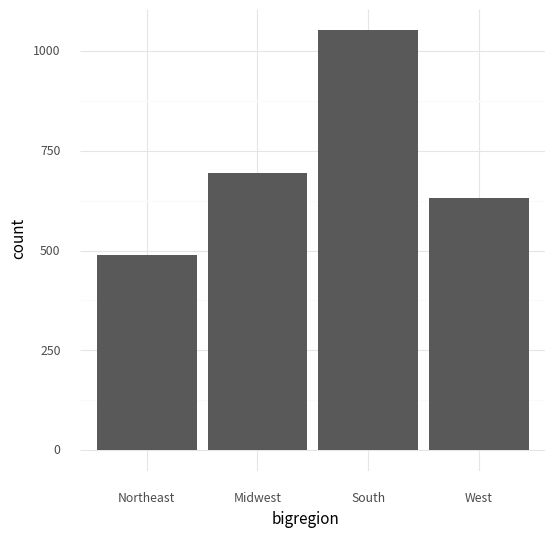

<ggplot: (8741538665370)>

In [7]:
# Fig. 4.6
p = ggplot(gss_sm, aes(x='bigregion'))
p + geom_bar()

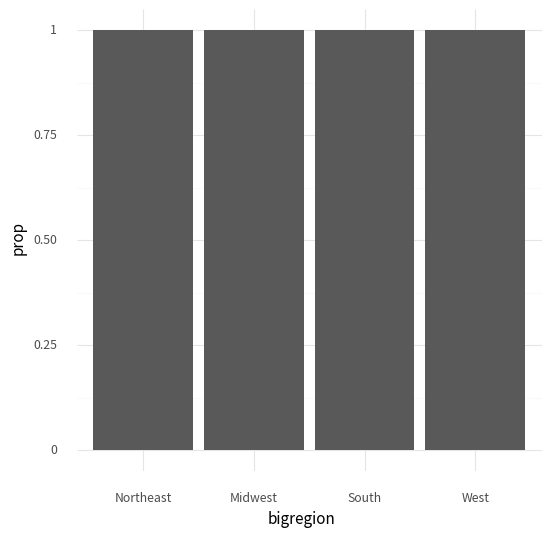

<ggplot: (8741579470583)>

In [8]:
# Fig. 4.7
p = ggplot(gss_sm, aes(x='bigregion'))
p + geom_bar(aes(y ='..prop..'))

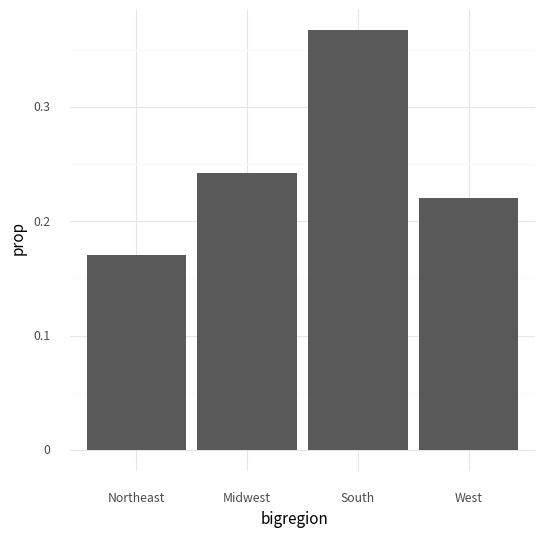

<ggplot: (8741579444830)>

In [9]:
# Fig. 4.8
p = ggplot(gss_sm, aes(x='bigregion'))
p + geom_bar(aes(y='..prop..', group=1))

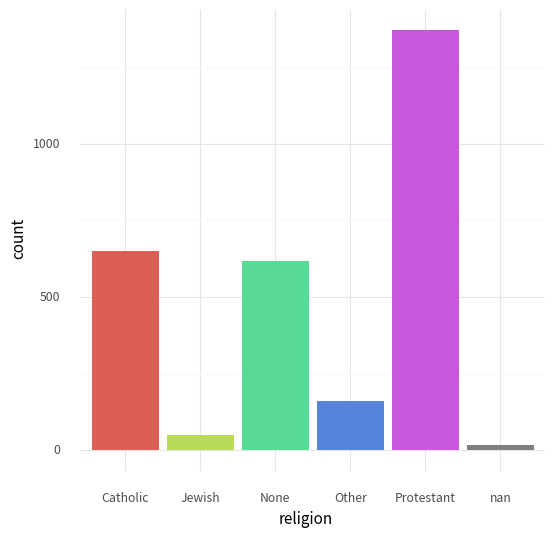

<ggplot: (8741579742998)>

In [10]:
# Fig. 4.9
# TODO: cannot recognize categorical 
p = ggplot(gss_sm.assign(religion=lambda d: d['religion'].astype(str)), aes(x='religion', color='religion'))
p + geom_bar()

p = ggplot(gss_sm.assign(religion=lambda d: d['religion'].astype(str)), aes(x='religion', fill='religion'))
p + geom_bar() + guides(fill=False)

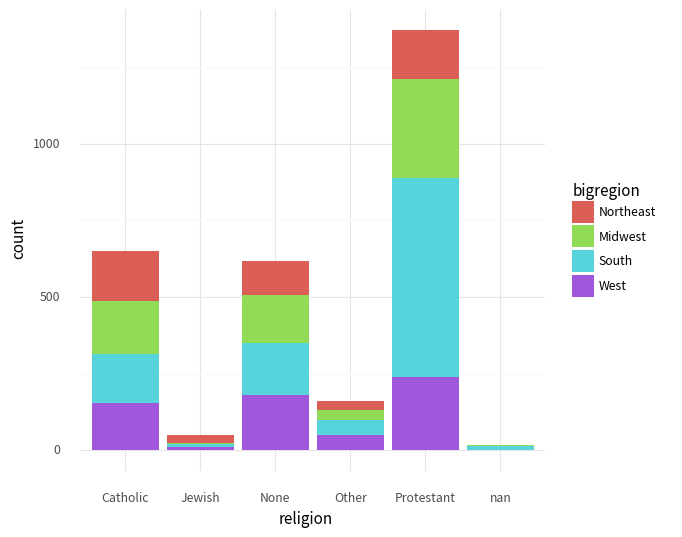

<ggplot: (8741538563271)>

In [11]:
# Fig. 4.10
p = ggplot(gss_sm.assign(religion=lambda d: d['religion'].astype(str)), aes(x='religion', fill='bigregion'))
p + geom_bar()

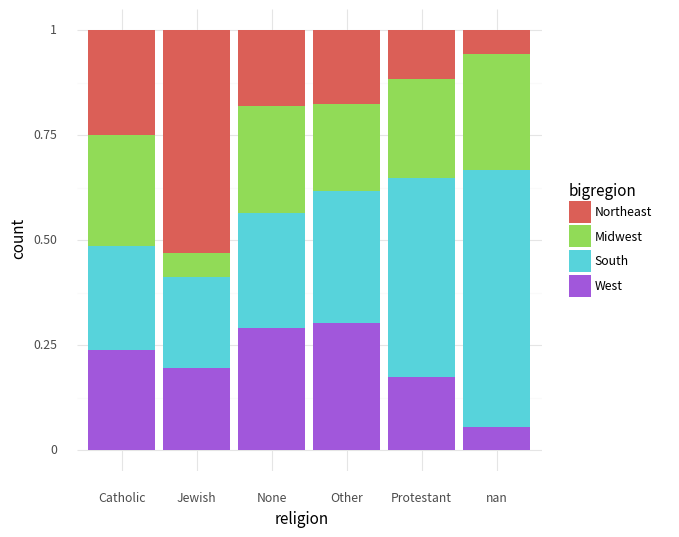

<ggplot: (8741579743184)>

In [12]:
# Fig. 4.11
p = ggplot(gss_sm.assign(religion=lambda d: d['religion'].astype(str)), aes(x='religion', fill='bigregion'))
p + geom_bar(position="fill")

In [13]:
# Fig. 4.12
# TODO: not working without `group=` 
p = ggplot(gss_sm.assign(religion=lambda d: d['religion'].astype(str)), aes(x='bigregion', fill='religion'))
p = ggplot(gss_sm, aes(x='bigregion', fill='factor(religion)'))
p + geom_bar(aes(y='..prop..'), position='dodge')

TypeError: '<' not supported between instances of 'str' and 'float'

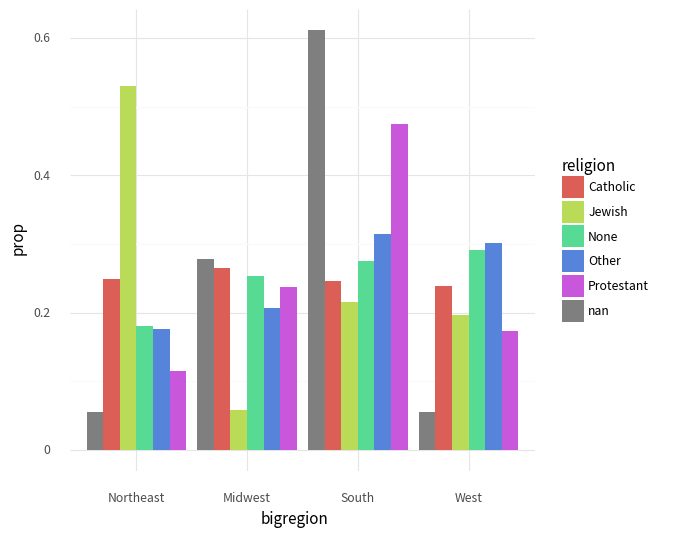

<ggplot: (8741579773832)>

In [14]:
# Fig. 4.13
p = ggplot(gss_sm.assign(religion=lambda d: d['religion'].astype(str)), aes(x='bigregion', fill='religion'))
p + geom_bar(aes(y='..prop..', group='religion'), position='dodge')

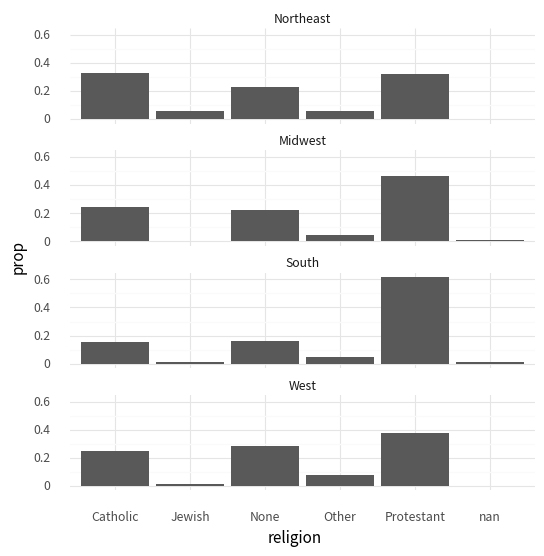

<ggplot: (8741538241199)>

In [15]:
# Fig. 4.14
p = ggplot(gss_sm.assign(religion=lambda d: d['religion'].astype(str)), aes(x='religion'))
p + geom_bar(
  aes(y='..prop..', group='bigregion'), position="dodge"
) + facet_wrap('bigregion', ncol=1)

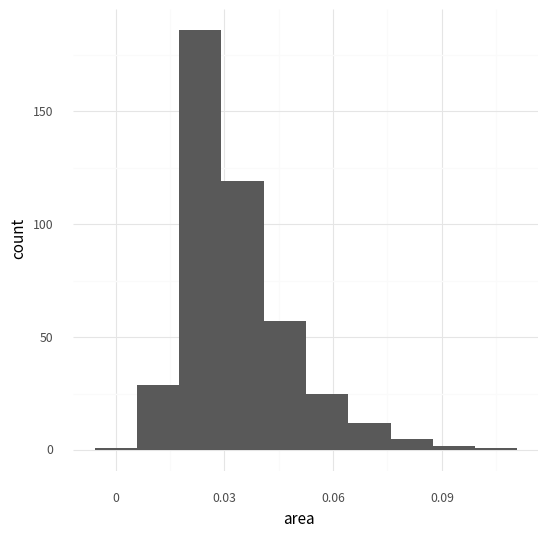

<ggplot: (8741538133673)>

In [16]:
# Fig. 4.15
p = ggplot(midwest, aes(x='area'))
p + geom_histogram()
p = ggplot(midwest, aes(x='area'))
p + geom_histogram(bins = 10)

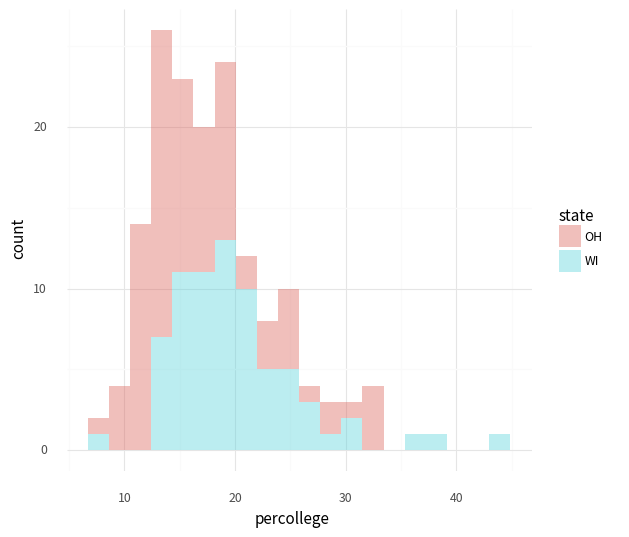

<ggplot: (8741538133667)>

In [17]:
# Fig. 4.16
oh_wi = ["OH", "WI"]
p = ggplot(
  midwest.loc[lambda d: d['state'].isin(oh_wi)],
  aes(x='percollege', fill='state'))
p + geom_histogram(alpha=0.4, bins=20)

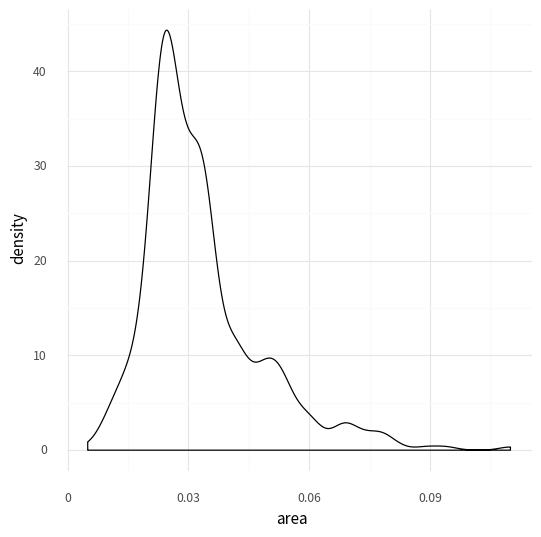

<ggplot: (8741538124758)>

In [18]:
# Fig. 4.17
p = ggplot(midwest, aes(x='area'))
p + geom_density()

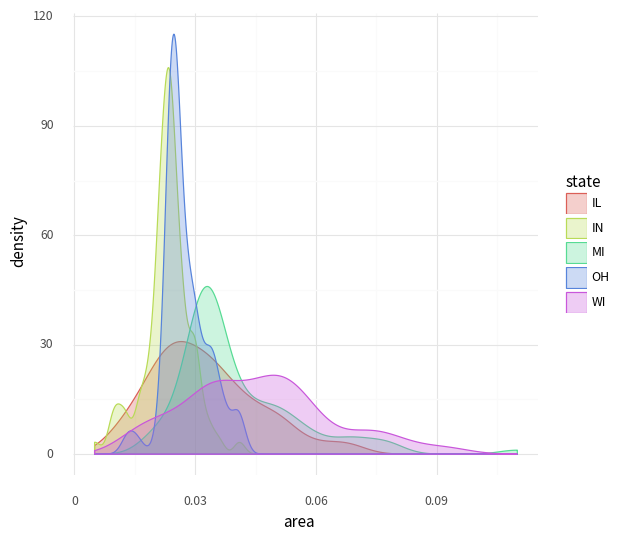

<ggplot: (8741538109293)>

In [19]:
# Fig. 4.18
p = ggplot(midwest,
           aes(x='area', fill='state', color='state'))
p + geom_density(alpha=0.3)

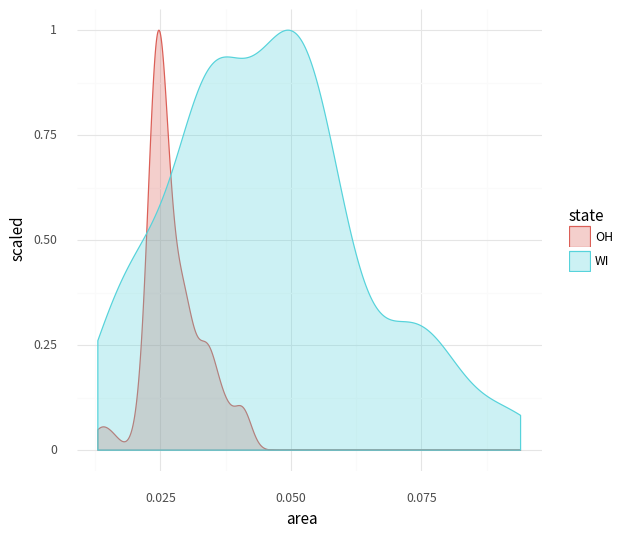

<ggplot: (8741538092183)>

In [20]:
# Fig. 4.19
p = ggplot(midwest.loc[lambda d: d['state'].isin(oh_wi)],
           aes(x='area', fill='state', color='state'))
p + geom_density(aes(y='..scaled..'), alpha=0.3)

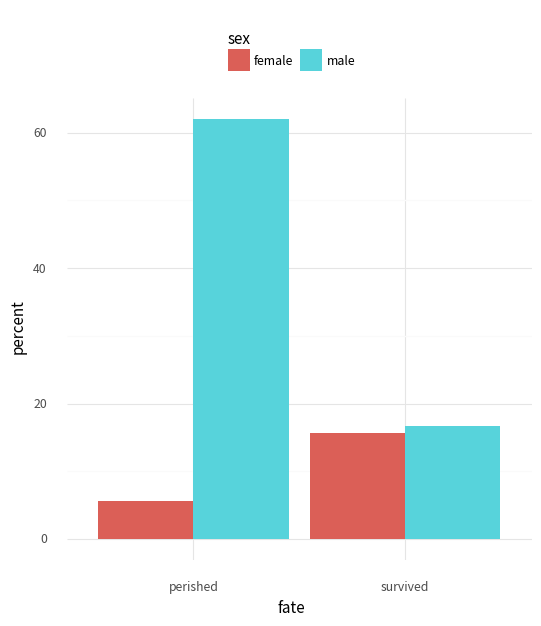

<ggplot: (8741537963581)>

In [21]:
# Fig. 4.20
p = ggplot(titanic,
           aes(x='fate', y='percent', fill='sex'))
p + geom_bar(position='dodge', stat='identity') + theme(legend_position="top")